In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


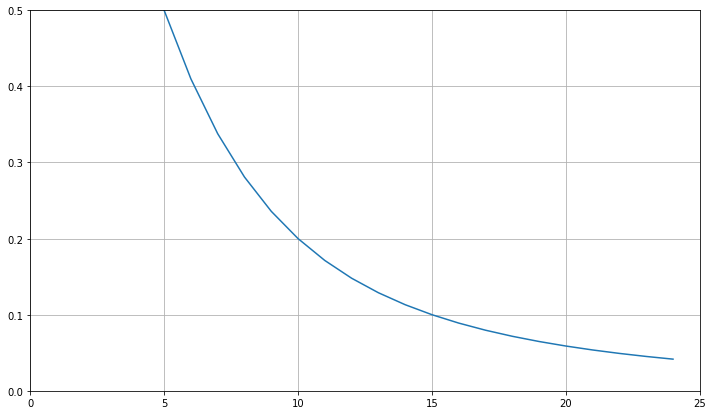

In [4]:
n=16
gamma=lambda x:1/x
betta = lambda x,y: 1/(1+x*y*y)

x = np.arange(n)

fig = plt.figure(figsize=(12,7))
plt.plot(betta(gamma(25),np.arange(25)))
#plt.plot(betta(gamma(100),np.arange(100)))
plt.xlim((0,25))
plt.ylim((0,0.5))
plt.grid()
plt.show()

c:\Users\NicolasG\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\NicolasG\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\NicolasG\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\NicolasG\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\NicolasG\anaconda3\lib\site-packages\numpy\core\_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\NicolasG\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mea

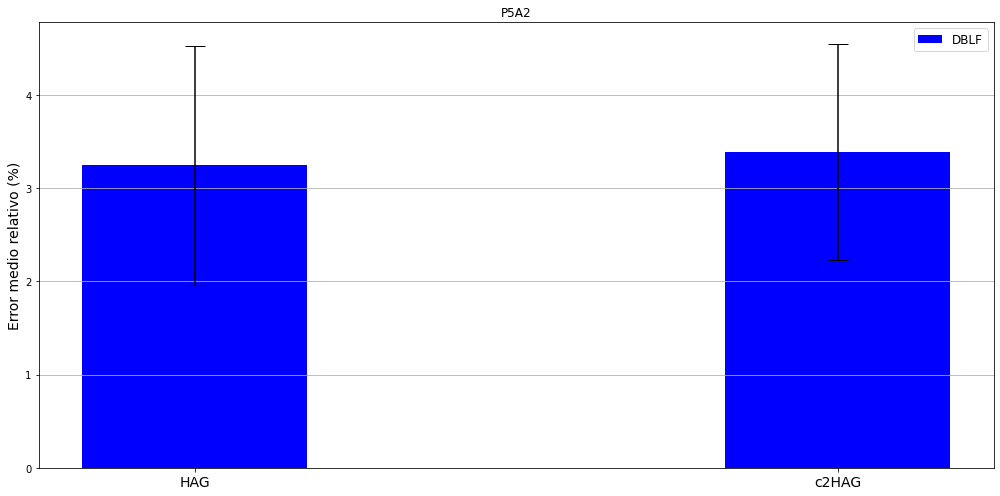

In [5]:
np.set_printoptions(suppress=True)

def getData(name:str,problemas:list[list[int]]):
    problems = problemas[0]
    alg = problemas[1]
    lst1=[]
    lst2=[]
    error1=[]
    error2=[]
    for p in problems:
        for a in alg:
            path="Results/P"+str(p)+"A"+str(a)+"/"
            data = np.array(pd.read_csv(path+name+".csv",sep=" ",header=None))
            h1 = data[:20]
            h2 = data[20:]
            h1[:,0] = ((1-h1[:,0])/h1[:,0])*100
            h2[:,0] = ((1-h2[:,0])/h2[:,0])*100
            mean1 = np.mean(h1,axis=0)  
            mean2 = np.mean(h2,axis=0)
            var1 = (np.std(h1,axis=0)/np.sqrt(np.size(h1)))*1.96
            var2 = (np.std(h2,axis=0)/np.sqrt(np.size(h2)))*1.96
            error1.append(var1)
            error2.append(var2)
            lst1.append(mean1)
            lst2.append(mean2)
    return (lst1,lst2,error1,error2)
def CreateDataMean(names:list[str],problemas:list[list[int]]):
    g1=[]
    g2=[]
    e1=[]
    e2=[]
    for nm in names:
        lst1,lst2,err1,err2 = getData(nm,problemas)
        g1.append(lst1)
        g2.append(lst2)
        e1.append(err1)
        e2.append(err2)
    return (g1,g2,e1,e2)

def GetParam(ix:int,names:list[str],problemas:list[list[int]]):
    lst1 = []
    lst2=[]
    err1=[]
    err2=[]
    g1,g2,e1,e2 =CreateDataMean(names,problemas)

    for i in np.arange(len(g1[0])):
        aux = []
        aux2=[]
        er1=[]
        er2=[]
        for j in np.arange(len(g1)):
            aux.append(g1[j][i][ix])
            aux2.append(g2[j][i][ix])
            er1.append(e1[j][i][ix])
            er2.append(e2[j][i][ix])
        err1.append(er1)
        err2.append(er2)
        lst1.append(aux)
        lst2.append(aux2)
    return lst1,lst2,err1,err2
def PlotBar(algs:list,algs2:list,err1:list,err2:list,names:list[str],title:str,param:int):
    if param ==0:
        yname="Error medio relativo (%)"
    elif param == 1:
        yname="Cajas faltantes promedio"
    elif param == 2:
        yname = "Iteración media"
    elif param == 3:
        yname = "Tiempo medio (s)"
    else:
        yname="Tiempo/iteración media (s)"
    
    X=np.arange(len(names))
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(X+0, algs,color='blue',width=0.35,label="DBLF",yerr=err1, ecolor='black', capsize=10)
    #ax.bar(X+0.35, algs2,color='orangered',width=0.35,label="DBLF2",yerr=err2, ecolor='black', capsize=10)
    ax.set_title(label=title,fontdict={"fontsize":12})
    ax.set_ylabel(yname,{"fontsize":14})
    ax.legend(prop={"size":12})
    plt.xticks(ticks=X,labels=names,fontsize=14)
    ax.grid(b=True,axis="y")
    #fig.savefig("Images/"+foldernm+"/"+title+'.jpg')
    fig.tight_layout()

namesHAG = ['HAG','c2HAG']
pathAG=['HAG','c2HAG']
namesABC=['DABC','EDABC']
pathABC=["DABC","EDABC"]
namesFFA=['DFFA',"EDFFA","EDFFA(C1)","EDFFA(C2)"]
pathFFA=['DFFA',"EDFFA","c1EDFFA","c2EDFFA"]

algsNm=["P5A2"]

param = 0

algs,algs2,err1,err2 = GetParam(param,pathAG,[[5],[2]])
for i in np.arange(len(algs)):
    PlotBar(algs[i],algs2[i],err1[i],err2[i],namesHAG,algsNm[i],param)